In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
trip = pd.read_csv('/content/drive/MyDrive/Data analytics/test.csv')

In [ ]:
trip

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,1121.0
14996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,1744.0
14997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,1362.0
14998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,101.0


In [ ]:
trip.ndim

2

In [ ]:
trip.head()


,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [ ]:
trip.size

285000

In [ ]:
trip.shape

(15000, 19)

In [ ]:
trip.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,9.103765,1.100133,1.124467,31.839195,0.322007,0.487033,6.150660,2.250380,0.299920,41.359166,152.239133,145.618667,2018.0,6.124067,15.242733,2.876267,13.840733,2234.605000
std,4.480066,0.550751,0.348209,14.499355,0.419592,0.079471,4.525842,3.440184,0.004898,19.210809,59.598449,76.352283,0.0,3.324166,8.670526,1.920591,6.219299,4843.770638
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.000000
25%,6.500000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1461.000000
50%,8.730000,1.000000,1.000000,29.000000,0.000000,0.500000,6.055000,0.000000,0.300000,38.410000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1863.000000
75%,10.940000,1.000000,1.000000,36.000000,0.500000,0.500000,8.060000,5.760000,0.300000,48.092500,186.000000,226.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2356.000000
max,69.940000,5.000000,4.000000,300.000000,18.000000,0.500000,125.000000,33.800000,0.300000,389.120000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86347.000000


In [ ]:
trip.isnull().sum()

,0
trip_distance,0
rate_code,0
store_and_fwd_flag,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0
imp_surcharge,0


<Axes: xlabel='trip_distance', ylabel='total_amount'>

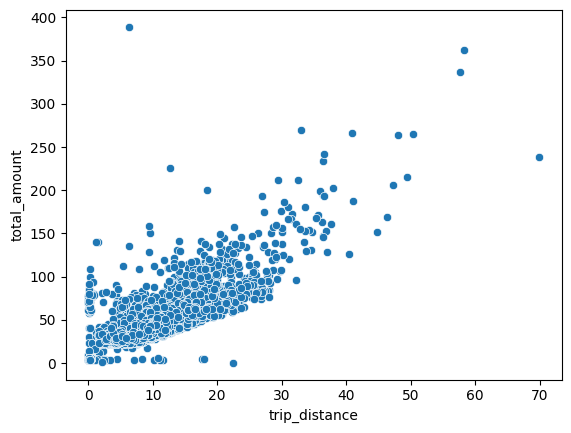

In [ ]:
sns.scatterplot(x=trip['trip_distance'],y=trip['total_amount'])

<Axes: xlabel='trip_distance'>

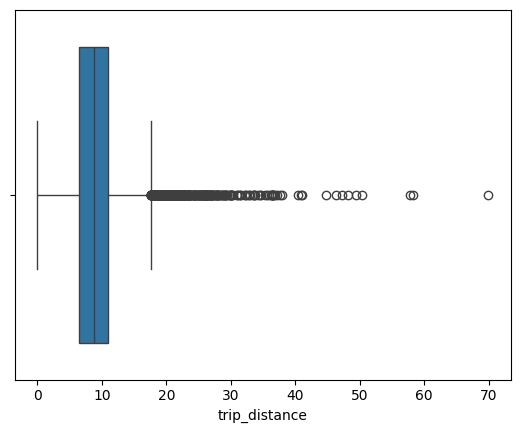

In [ ]:
sns.boxplot(x=trip['trip_distance'])

In [ ]:
trip.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration'],
      dtype='object')

In [ ]:
x = trip[['trip_distance']]

In [ ]:
y = trip[['total_amount']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction

array([[37.33251202],
       [31.5366975 ],
       [35.74556281],
       ...,
       [52.89151411],
       [44.23229122],
       [45.75024264]])

In [ ]:
new_data = [[15.70]]

In [ ]:
prediction = model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediction

array([[64.03465751]])